In [8]:
def plot_pr(model,x,y):
    """ 
    Plots precision vs. recall graph
    
    Plots a linegraph of a model's precision and recall metrics over a range of threshold values
    
    Args:
        model (sklearn binary classifier): a trained binary classification model from the scikit-learn library
        x (array): an array of the model's features
        y (array): an array of the true labels of the x array's instances
        
    Returns:
        None
    """
    
    # import library functions
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Initialize values
    
    # initialize empty lists for precision and recall values
    prec_vals = []
    rec_vals = []
    
    # initialize current precision and recall
    curr_prec = 0
    curr_rec = 0
    
    # record predicted decision values
    y_deci_vals = model.decision_function(x)
    
    # initialize current threshold with the maximum predicted decision value in x
    curr_thresh = np.max(y_deci_vals)
    
    # set smoothness of the linegraph
    smoothness = 100
    
    # computer step size for incrementing threshold 
    step_size = (np.max(y_deci_vals) - np.min(y_deci_vals)) / smoothness
    
    # Compute metric values to grahp
    
    # get precision and recall values while decreasing threshold until recall is 1.00
    while curr_rec < 1 :

        # get predicted category values at the current threshold
        pred_y = (y_deci_vals >= curr_thresh)
        pred_y = np.array(pred_y).astype(int)
                
        # comptute current precision and recall values
        curr_prec = precision_score(y,pred_y)
        curr_rec = recall_score(y,pred_y)
        
        # append precision and recall values
        prec_vals.append(curr_prec)
        rec_vals.append(curr_rec)
                
        # decrement current threshold value vy step size
        curr_thresh -= step_size
    
    # calculate maximum F1 score over the various thresholds
    prec_vals = np.array(prec_vals)
    rec_vals = np.array(rec_vals)
    f1 = (2 * prec_vals * rec_vals / (prec_vals + rec_vals))
    f1_max_arg = np.argmax(f1)
    f1_max_rec = rec_vals[f1_max_arg]
    f1_max_prec = prec_vals[f1_max_arg]
              
    
    # plot precision and recall values
    plt.plot(rec_vals, prec_vals, color = "blue", label = "Model")
    
    # plot maximum F1 score as point
    plt.plot([f1_max_rec], [f1_max_prec], color = "red", marker = 'o', markersize = 4, label = 'Max F1')
    
    # plot design
    plt.title("Recall vs. Precision Graph")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()
    
    

In [2]:
# test function

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# read in data
df = pd.read_csv('Buy_data.csv')
df.drop("User ID", axis = 1, inplace = True)
df.Gender = pd.get_dummies(df.Gender)['Male']
df["EstimatedSalaryStd"] = (df.EstimatedSalary - np.mean(df.EstimatedSalary)) / np.std(df.EstimatedSalary)
x = df[['Gender','Age','EstimatedSalaryStd']]
y = df.Purchased

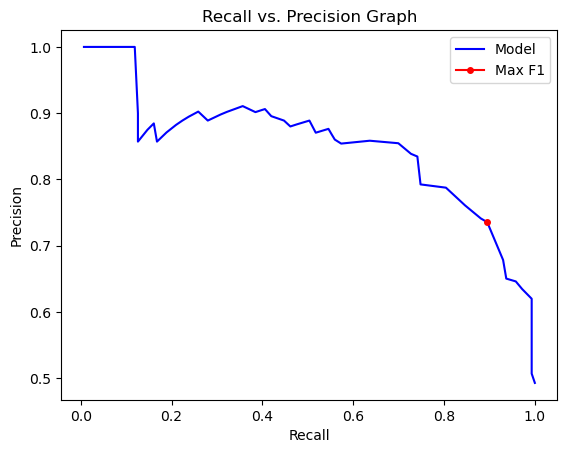

In [9]:
model = LogisticRegression()
model.fit(x,y)

plot_pr(model,x,y)